<a href="https://colab.research.google.com/github/LatiefDataVisionary/deep-learning-college-task/blob/main/tasks/week_5_tasks/Task_ViT_HuggingFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

hehe

### **0.1. Install Libraries (Instalasi Library)**

**Penjelasan:** Menginstal library tambahan yang mungkin diperlukan, seperti versi spesifik dari tensorflow atau library lain yang tidak termasuk dalam instalasi Colab dasar. Saat ini, library utama seperti TensorFlow dan Keras sudah terinstal, namun baris ini dapat ditambahkan jika ada kebutuhan library lain di masa depan.

In [ ]:
# !pip install opencv-python

### **0.2. Mount Google Drive (Menghubungkan Google Drive)**

**Penjelasan:** Menghubungkan notebook ini dengan akun Google Drive Anda. Ini diperlukan agar notebook dapat membaca file dataset gambar yang telah Anda simpan di Google Drive. Setelah menjalankan sel ini, ikuti instruksi otorisasi yang muncul.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Section 1: Import Libraries and Environment Setup (Impor Library dan Pengaturan Lingkungan)**

**Penjelasan:** Di sini kita akan mengimpor semua modul dan library yang dibutuhkan untuk keseluruhan proyek serta mendefinisikan variabel-variabel global seperti path direktori, ukuran gambar, dan parameter training.

### **1.1. Import Core Libraries (Impor Library Utama)**

**Penjelasan:** Mengimpor library utama seperti tensorflow, keras, numpy, matplotlib.pyplot, os, dan seaborn yang akan digunakan sepanjang proyek ini.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

### **1.2. Define Configurations (Definisi Konfigurasi)**

**Penjelasan:** Mendefinisikan variabel-variabel konfigurasi yang akan digunakan di seluruh notebook, termasuk path ke dataset, ukuran gambar yang akan digunakan, ukuran batch untuk training, jumlah epoch, dan jumlah kelas (mahasiswa).

Link Dataset Google Drive: https://drive.google.com/drive/folders/1S5mRxYOfTPAmfqqFFLfbV_D5eWj5J9ox?usp=sharing

In [ ]:
# Define Directory Paths (Definisi Path Direktori)
TRAIN_DIR = '/content/drive/MyDrive/Dataset/Dataset Sistem Presensi Wajah V1.0/Data Train'
TEST_DIR = '/content/drive/MyDrive/Dataset/Dataset Sistem Presensi Wajah V1.0/Data Test'

# Define Image Parameters (Definisi Parameter Gambar)
IMG_HEIGHT = 150
IMG_WIDTH = 150
CHANNELS = 3 # RGB color images

# Define Training Parameters (Definisi Parameter Pelatihan)
BATCH_SIZE = 32
EPOCHS = 50 # Will be controlled by Early Stopping
NUM_CLASSES = 57 # Total number of unique students

### **1.3. Extract Dataset (Ekstrak Dataset)**

**Penjelasan:** Mengekstrak file dataset dari Google Drive ke lingkungan Colab agar dapat diakses sebagai direktori biasa.

In [ ]:
# Define the path to the zip file in Google Drive
zip_path = '/content/drive/MyDrive/Dataset/Dataset Sistem Presensi Wajah V1.0.zip'
extract_path = '/content/dataset' # Directory to extract the dataset

# Create the extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Extract the zip file
print(f"Extracting {zip_path} to {extract_path}...")
try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Extraction complete.")
except FileNotFoundError:
    print(f"Error: Zip file not found at {zip_path}")
except zipfile.BadZipFile:
    print(f"Error: Could not open or read zip file at {zip_path}. It might be corrupted.")
except Exception as e:
    print(f"An error occurred during extraction: {e}")

# Update TRAIN_DIR and TEST_DIR to point to the extracted directories
# Based on the previous output, the extracted content is in a subfolder
extracted_subfolder = os.path.join(extract_path, 'Dataset Sistem Presensi Wajah V1.0')
TRAIN_DIR = os.path.join(extracted_subfolder, 'Data Train')
TEST_DIR = os.path.join(extracted_subfolder, 'Data Test')


print(f"Updated TRAIN_DIR: {TRAIN_DIR}")
print(f"Updated TEST_DIR: {TEST_DIR}")

# Verify that the directories exist after extraction
if os.path.exists(TRAIN_DIR):
    print(f"TRAIN_DIR exists: {TRAIN_DIR}")
else:
    print(f"Error: TRAIN_DIR not found after extraction at {TRAIN_DIR}")

if os.path.exists(TEST_DIR):
    print(f"TEST_DIR exists: {TEST_DIR}")
else:
    print(f"Error: TEST_DIR not found after extraction at {TEST_DIR}")

# Now it's safe to list contents if needed for verification after extraction
print(f"Contents of {extract_path} after extraction: {os.listdir(extract_path)}")

Extracting /content/drive/MyDrive/Dataset/Dataset Sistem Presensi Wajah V1.0.zip to /content/dataset...
Extraction complete.
Updated TRAIN_DIR: /content/dataset/Dataset Sistem Presensi Wajah V1.0/Data Train
Updated TEST_DIR: /content/dataset/Dataset Sistem Presensi Wajah V1.0/Data Test
TRAIN_DIR exists: /content/dataset/Dataset Sistem Presensi Wajah V1.0/Data Train
TEST_DIR exists: /content/dataset/Dataset Sistem Presensi Wajah V1.0/Data Test
Contents of /content/dataset after extraction: ['Dataset Sistem Presensi Wajah V1.0']


## **Section 2: Data Loading and Inspection (Pemuatan dan Inspeksi Data)**

**Penjelasan:** Langkah ini bertujuan untuk memuat dataset, memeriksa strukturnya, dan menampilkan beberapa sampel gambar untuk memastikan data ter-load dengan benar.

### **1.4. Verify Extracted Directory Contents (Verifikasi Isi Direktori Hasil Ekstraksi)**

**Penjelasan:** Setelah ekstraksi, periksa isi direktori tujuan (`/content/dataset`) untuk memastikan file dan folder dataset ada dan untuk mengetahui nama folder yang sebenarnya (misalnya, "Data Train" dan "Data Test" atau nama lain).

In [ ]:
# import os

# # List contents of the extracted directory
# extracted_contents = os.listdir('/content/dataset')
# print(f"Contents of /content/dataset: {extracted_contents}")

# If the extracted folders have different names, update TRAIN_DIR and TEST_DIR accordingly
# For example, if you see 'Train' and 'Test' instead of 'Data Train' and 'Data Test':
# TRAIN_DIR = os.path.join('/content/dataset', 'Train')
# TEST_DIR = os.path.join('/content/dataset', 'Test')

# If files are directly in /content/dataset without subfolders, the approach for data loading needs adjustment

In [ ]:
# Count the number of files in each directory
train_image_count = sum([len(files) for r, d, files in os.walk(TRAIN_DIR)])
test_image_count = sum([len(files) for r, d, files in os.walk(TEST_DIR)])

print(f"Jumlah total gambar di Data Train: {train_image_count}")
print(f"Jumlah total gambar di Data Test: {test_image_count}")

# Get the class names (student names) from the directory names
class_names = sorted(os.listdir(TRAIN_DIR))
print(f"\nJumlah kelas (mahasiswa) terdeteksi: {len(class_names)}")
print(f"Nama kelas (mahasiswa) contoh: {class_names[:10]}...") # Display first 10 class names

Jumlah total gambar di Data Train: 1696
Jumlah total gambar di Data Test: 424

Jumlah kelas (mahasiswa) terdeteksi: 1696
Nama kelas (mahasiswa) contoh: ['5221911012_Debora_03.jpg', '5221911012_Debora_04.jpg', '5221911012_Debora_05.jpg', '5221911012_Debora_06.jpg', '5221911012_Debora_07.jpg', '5221911012_Debora_08.jpg', '5221911012_Debora_11.jpg', '5221911012_Debora_12.jpg', '5221911012_Debora_13.jpg', '5221911012_Debora_14.jpg']...


### **2.1. Load Dataset Paths (Memuat Path Dataset)**

**Penjelasan:** Kode untuk menghitung jumlah total gambar training dan testing.

In [ ]:
# Count the number of files in each directory
train_image_count = sum([len(files) for r, d, files in os.walk(TRAIN_DIR)])
test_image_count = sum([len(files) for r, d, files in os.walk(TEST_DIR)])

print(f"Jumlah total gambar di Data Train: {train_image_count}")
print(f"Jumlah total gambar di Data Test: {test_image_count}")

# Get the class names (student names) from the directory names
class_names = sorted(os.listdir(TRAIN_DIR))
print(f"\nJumlah kelas (mahasiswa) terdeteksi: {len(class_names)}")
print(f"Nama kelas (mahasiswa) contoh: {class_names[:10]}...") # Display first 10 class names

Jumlah total gambar di Data Train: 1696
Jumlah total gambar di Data Test: 424

Jumlah kelas (mahasiswa) terdeteksi: 1696
Nama kelas (mahasiswa) contoh: ['5221911012_Debora_03.jpg', '5221911012_Debora_04.jpg', '5221911012_Debora_05.jpg', '5221911012_Debora_06.jpg', '5221911012_Debora_07.jpg', '5221911012_Debora_08.jpg', '5221911012_Debora_11.jpg', '5221911012_Debora_12.jpg', '5221911012_Debora_13.jpg', '5221911012_Debora_14.jpg']...


### **2.2. Inspect Class Distribution (Inspeksi Distribusi Kelas)**

**Penjelasan:** Visualisasikan jumlah gambar per kelas untuk memastikan dataset seimbang.

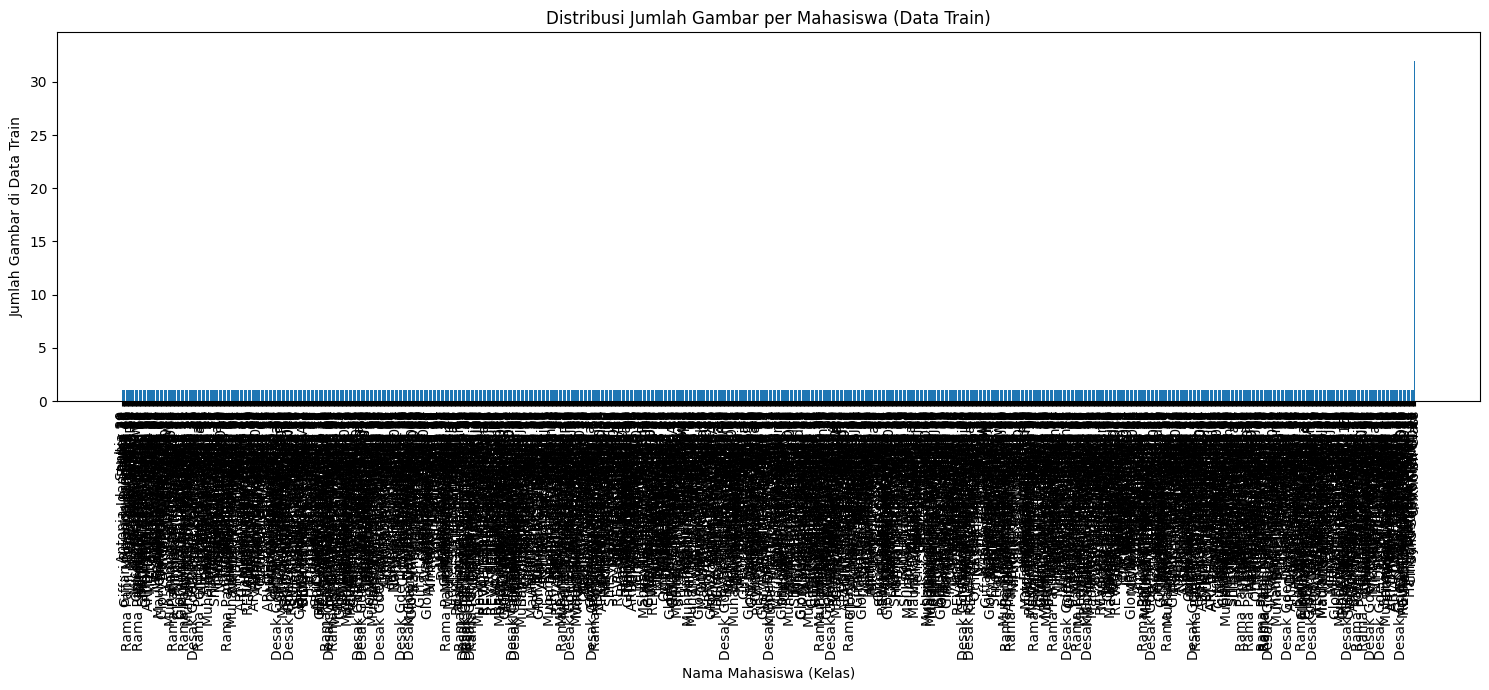

In [ ]:
# Count images per class by extracting class name from filename
train_class_counts = {}
for filename in os.listdir(TRAIN_DIR):
    if filename.endswith('.jpg'): # Process only image files
        # Extract class name from filename (assuming format like ID_Nama_Number.jpg)
        class_name_parts = filename.split('_')
        if len(class_name_parts) > 1:
            # Assuming the second part is the name
            class_name = class_name_parts[1]
            # Handle potential extra parts or different naming conventions
            if len(class_name_parts) > 2 and class_name_parts[2].isdigit():
                 class_name = class_name # Keep only the name part if structure is consistent
            elif len(class_name_parts) > 2 and not class_name_parts[2].isdigit():
                 class_name = class_name_parts[1] + " " + class_name_parts[2].split('.')[0] # Handle names with spaces like "Nama Belakang"
        else:
            class_name = "Unknown Class" # Fallback if filename format is unexpected

        if class_name in train_class_counts:
            train_class_counts[class_name] += 1
        else:
            train_class_counts[class_name] = 1

# Sort classes by count for better visualization
sorted_class_counts = dict(sorted(train_class_counts.items(), key=lambda item: item[1]))

# Plot class distribution
plt.figure(figsize=(15, 7))
plt.bar(sorted_class_counts.keys(), sorted_class_counts.values())
plt.xticks(rotation=90)
plt.xlabel("Nama Mahasiswa (Kelas)")
plt.ylabel("Jumlah Gambar di Data Train")
plt.title("Distribusi Jumlah Gambar per Mahasiswa (Data Train)")
plt.tight_layout()
plt.show()

In [ ]:
# Check if all class counts are the same
if len(train_class_counts) > 0:
    first_count = list(train_class_counts.values())[0]
    all_counts_same = all(count == first_count for count in train_class_counts.values())

    if all_counts_same:
        print("\nSemua mahasiswa memiliki jumlah gambar yang sama di Data Train.")
    else:
        print("\nJumlah gambar per mahasiswa di Data Train bervariasi.")
else:
    print("\nTidak ada data kelas yang ditemukan untuk diperiksa.")


Jumlah gambar per mahasiswa di Data Train bervariasi.


### **2.3. Visualize Sample Images (Visualisasi Sampel Gambar)**

**Penjelasan:** Tampilkan beberapa gambar acak dari dataset training beserta labelnya untuk melihat variasi pose, ekspresi, dan pencahayaan yang ada.

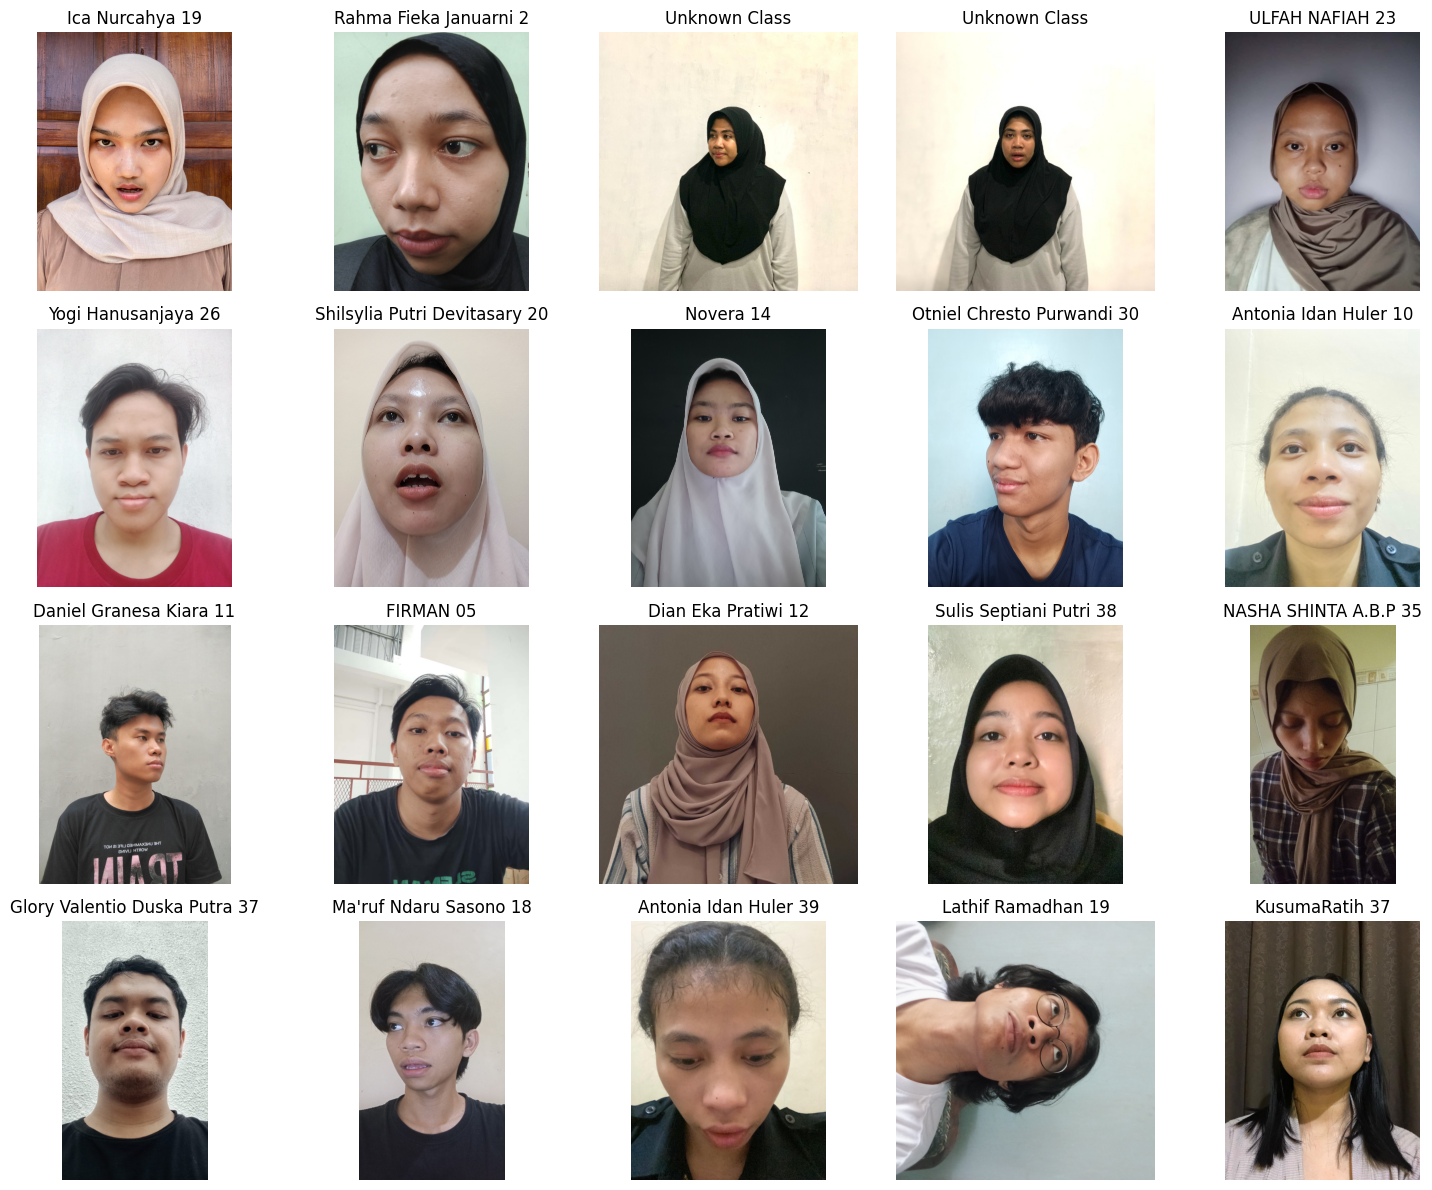

In [ ]:
plt.figure(figsize=(15, 12)) # Adjust figure size for more images
# Get all image files from the training directory
all_train_images = [os.path.join(TRAIN_DIR, f) for f in os.listdir(TRAIN_DIR) if f.endswith('.jpg')]

# Check if there are enough images
num_samples_to_display = 20 # Set the number of samples to display
if len(all_train_images) < num_samples_to_display:
    print(f"Tidak cukup gambar ({len(all_train_images)}) di direktori training untuk menampilkan {num_samples_to_display} sampel.")
else:
    # Select random images
    sample_images_paths = np.random.choice(all_train_images, size=num_samples_to_display, replace=False)

    for i, img_path in enumerate(sample_images_paths):
        plt.subplot(4, 5, i + 1) # Adjust subplot grid to 4 rows and 5 columns
        img = plt.imread(img_path)
        plt.imshow(img)
        # Extract class name from filename (assuming format like ID_Nama_Number.jpg)
        filename = os.path.basename(img_path)
        class_name_parts = filename.split('_')
        if len(class_name_parts) > 1:
            # Assuming the second part is the name
            class_name = class_name_parts[1]
            # Handle potential extra parts or different naming conventions
            if len(class_name_parts) > 2 and class_name_parts[2].isdigit():
                 class_name = class_name # Keep only the name part if structure is consistent
            elif len(class_name_parts) > 2 and not class_name_parts[2].isdigit():
                 class_name = class_name_parts[1] + " " + class_name_parts[2].split('.')[0] # Handle names with spaces like "Nama Belakang"
        else:
            class_name = "Unknown Class" # Fallback if filename format is unexpected

        plt.title(class_name)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

## **Section 0: Initial Setup (Pengaturan Awal)**

**Penjelasan:** Bagian ini untuk melakukan instalasi library penting yang mungkin belum ada di Colab dan menghubungkan Google Drive.

### **0.1. Install Libraries (Instalasi Library)**

**Penjelasan:** Menginstal library tambahan yang mungkin diperlukan, yaitu `mtcnn` yang merupakan library kunci untuk deteksi wajah.

In [1]:
# Install mtcnn library
!pip install opencv

ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv


### **0.2. Mount Google Drive (Menghubungkan Google Drive**)

**Penjelasan:** Menghubungkan notebook ini dengan akun Google Drive Anda. Ini diperlukan agar notebook dapat membaca file dataset gambar yang telah Anda simpan di Google Drive. Setelah menjalankan sel ini, ikuti instruksi otorisasi yang muncul.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
